# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [19]:
file_path <- "/kaggle/input/da-worksheet1/productivity_data_owa.csv"

data <- read.csv(file_path)

df <- as.data.frame(data)

df

Sl_No,RemoteWorkSetting,ProductivityScore
<int>,<chr>,<dbl>
0,Hybrid,93.08691
1,Coworking space,95.43247
2,Hybrid,71.42055
3,Hybrid,70.34142
4,Home office,64.21400
5,Hybrid,59.74954
6,Coworking space,87.45776
7,Hybrid,61.20824
8,Hybrid,72.64783


*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

Skewness for Hybrid Remote Work Setting: -0.164283389010485 


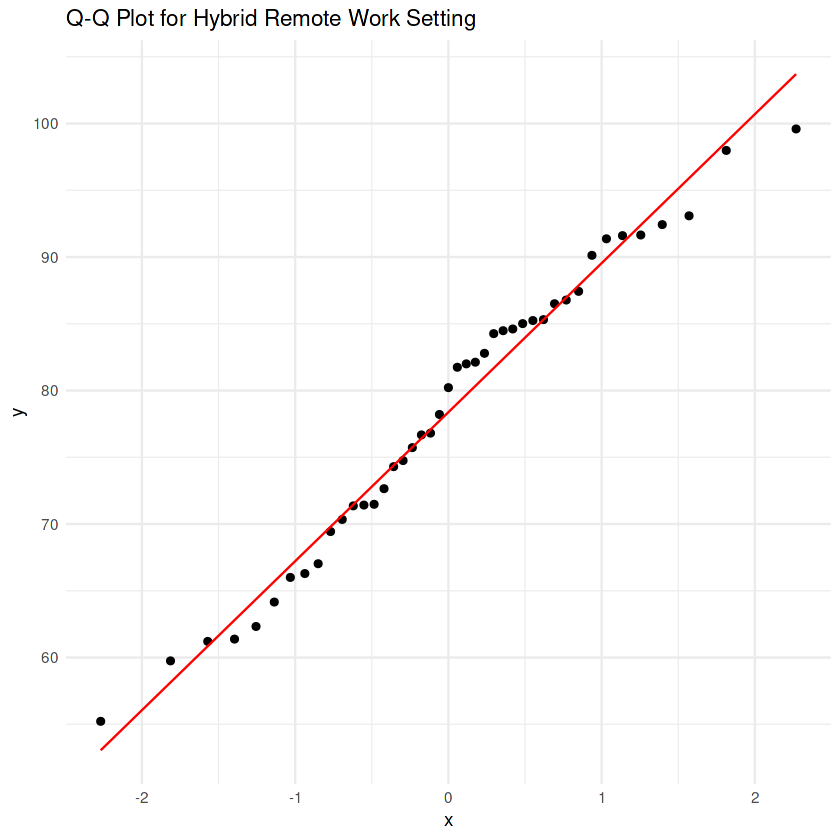

Skewness for Coworking space Remote Work Setting: -0.474242617399054 


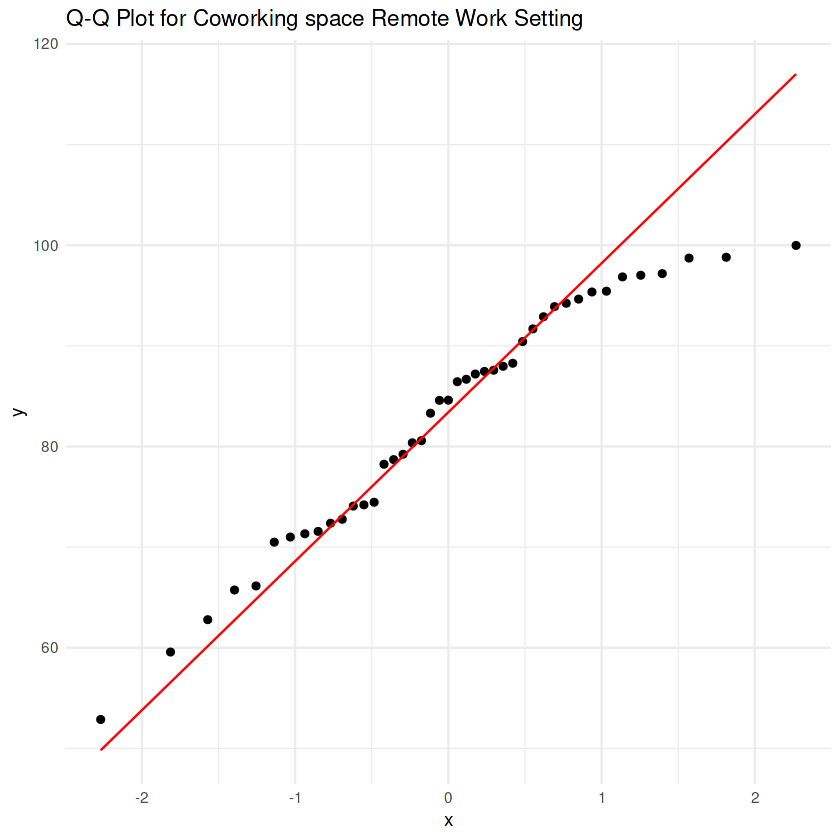

Skewness for Home office Remote Work Setting: -0.0075689262708859 


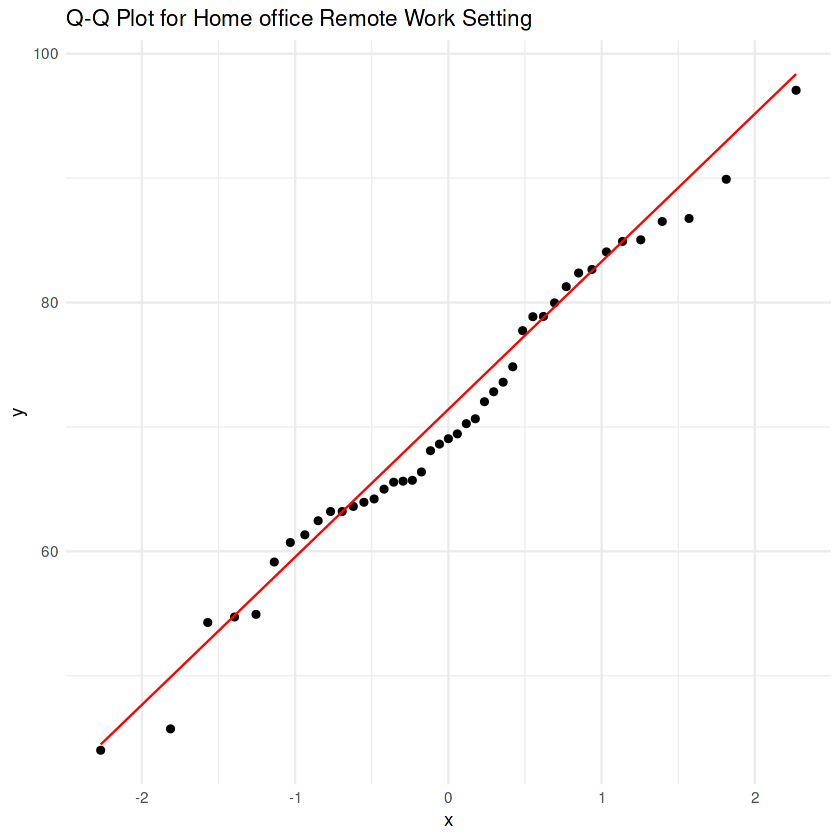

In [20]:

library(ggplot2)
library(moments)


groups <- unique(df$RemoteWorkSetting)

for (group in groups) {
  
  subset_data <- df[df$RemoteWorkSetting == group, "ProductivityScore", drop = FALSE]
  
  
  qqplot_title <- paste("Q-Q Plot for", group, "Remote Work Setting")
  qqplot <- ggplot(subset_data, aes(sample = ProductivityScore)) +
    stat_qq() +
    stat_qq_line(color = "red") +
    ggtitle(qqplot_title) +
    theme_minimal()
  
  print(qqplot)
  
  skewness_value <- skewness(subset_data$ProductivityScore, na.rm = TRUE)
  cat(paste("Skewness for", group, "Remote Work Setting:", skewness_value, "\n"))
}


The data meet the normality assumption required for ANOVA. This can be concluded from the Q-Q plots. All the points on each plot lie close to the straight line. This indicates that the data is normally distributed, so the normality assumption is met.

*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


The statistical method that can be used to determine if the work setting has any effect on productivity is ANOVA (Analysis of Variance).

ANOVA is a statistical test that can be used to compare the means of two or more groups. In this case, we would be comparing the mean productivity scores of employees in different work settings (remote, coworking space, and office).

Mathematical Derivation:

Null Hypothesis (H0): The mean productivity scores are equal across all work settings.
Alternative Hypothesis (H1): The mean productivity scores are not equal across all work settings.
F-statistic: The F-statistic is calculated by dividing the variance between the groups by the variance within the groups.
P-value: The p-value is the probability of observing the data if the null hypothesis is true.
Interpretation:

If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in mean productivity scores between the work settings.
If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in mean productivity scores between the work settings.
T-Test:

A t-test cannot be used in this scenario because it is only designed to compare the means of two groups. Since we have three work settings, we need a test that can compare multiple groups. ANOVA is the appropriate test for this situation.



*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [21]:

data$RemoteWorkSetting <- as.factor(data$RemoteWorkSetting)

anova_model <- aov(ProductivityScore ~ RemoteWorkSetting, data = data)

tukey_result <- TukeyHSD(anova_model)

print(tukey_result)



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685



Significance at α = 0.05:
    Home office vs. Coworking space: p-value = 0.0000077

    This pair is statistically significant as the p-value is much less than 0.05.
    Hybrid vs. Coworking space: p-value = 0.2005429

    This pair is not statistically significant at the 0.05 level.
    Hybrid vs. Home office: p-value = 0.0048685

    This pair is statistically significant as the p-value is less than 0.05.


Significance at α = 0.02:
    Home office vs. Coworking space: p-value = 0.0000077

    This pair is statistically significant at the 0.02 level.
    Hybrid vs. Coworking space: p-value = 0.2005429

    This pair is not statistically significant at the 0.02 level.
    Hybrid vs. Home office: p-value = 0.0048685

    This pair is statistically significant at the 0.02 level.

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [32]:

data1 <- read.csv("/kaggle/input/da-worksheet1/productivity_data_twa.csv", header=TRUE)
head(data1)



,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


In [33]:
data1$RemoteWorkSetting <- as.factor(data1$RemoteWorkSetting)
data1$CommunicationTool <- as.factor(data1$CommunicationTool)



In [34]:

anova_model <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data1)


summary(anova_model)


                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Effect of RemoteWorkSetting:

The RemoteWorkSetting factor is statistically significant with a p-value far below 0.05. This suggests that different work settings (Coworking Space, Home Office, Hybrid) have a significant impact on productivity scores.

Effect of CommunicationTool:

The CommunicationTool factor has a p-value of 0.0683. This is marginally significant at the 0.1 level but not at the 0.05 level. This implies that while there is some evidence that different communication tools (Zoom, Slack, Email) might affect productivity, the effect is not strong enough to be considered significant at the stricter 0.05 level.
Interaction Effect:

The interaction between RemoteWorkSetting and CommunicationTool has a p-value of 0.1454, which is not significant. This indicates that the effect of work settings on productivity does not significantly depend on the type of communication tool used, and vice versa.

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


In [35]:

tukey_result <- TukeyHSD(anova_model)

print(tukey_result)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data1)

$RemoteWorkSetting
                                  diff         lwr       upr     p adj
Home office-Coworking space -12.210330 -17.8446042 -6.576057 0.0000032
Hybrid-Coworking space       -5.555955 -11.2912056  0.179295 0.0597691
Hybrid-Home office            6.654375   0.9510242 12.357726 0.0177877

$CommunicationTool
                 diff        lwr        upr     p adj
Slack-Email  2.604196  -3.099155 8.30754697 0.5260147
Zoom-Email  -3.048076  -8.682349 2.58619828 0.4069792
Zoom-Slack  -5.652272 -11.387522 0.08297859 0.0543385

$`RemoteWorkSetting:CommunicationTool`
                                                   diff        lwr       upr
Home office:Email-Coworking space:Email     -19.3286542 -32.101300 -6.556008
Hybrid:Email-Coworking space:Email          -11.5308103 -24.529538  1.467918
Coworking space:Slack

Based on the significant findings, Hybrid work settings could be preferred over Home office for better productivity. For communication tools, while no significant differences were found, tools such as Email and Zoom might be worth considering if used in the Hybrid setting.

As an entrepreneur, adopting a Hybrid work setting with a focus on effective communication tools like Email or Zoom could be beneficial. This approach leverages the benefits of both in-office and remote work environments while addressing the productivity challenges seen in a Home office setting.

*fin*